In [9]:
import numpy as np
from hmmlearn import hmm
import array_to_latex as a2l
from ssm.plots import gradient_cmap, white_to_color_cmap
from theoretical_experiment.visual_tools import profive_cmap
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import scipy
from scipy.stats import qmc

In [10]:
cmap, colors = profive_cmap()

In [11]:

A = np.array([[0.1, 0.9, 0], [0, 0.4, 0.6], [0.2, 0, 0.8]])

vals, vecs = np.linalg.eig(A.T)

vec1 = vecs[:, np.isclose(vals, 1)].reshape(-1)
stationary = vec1 / vec1.sum()

print([2/14,  3/14, 9/14])
print(stationary.real)

pi = np.array([2/14,  3/14, 9/14])



[0.14285714285714285, 0.21428571428571427, 0.6428571428571429]
[0.14285714 0.21428571 0.64285714]


In [12]:
# sample example
np.random.seed(2023)

res = [np.random.choice([1, 2, 3], p=pi)]
for i in range(16):
    res.append(np.random.choice([1, 2, 3], p=A[res[i]-1]))

print(res)

colors_ = ['blue',  'teal', 'purple']

print(", ".join(["\\textcolor{" + colors_[r - 1] + "}{" + str(r) + "}" for r in res]))

[2, 3, 3, 1, 2, 3, 1, 2, 3, 3, 3, 3, 3, 1, 2, 2, 2]
\textcolor{teal}{2}, \textcolor{purple}{3}, \textcolor{purple}{3}, \textcolor{blue}{1}, \textcolor{teal}{2}, \textcolor{purple}{3}, \textcolor{blue}{1}, \textcolor{teal}{2}, \textcolor{purple}{3}, \textcolor{purple}{3}, \textcolor{purple}{3}, \textcolor{purple}{3}, \textcolor{purple}{3}, \textcolor{blue}{1}, \textcolor{teal}{2}, \textcolor{teal}{2}, \textcolor{teal}{2}


In [13]:
# Example Discrete HMM

B = np.array([[0.5, 0.15, 0.15, 0.2],
              [0.2, 0.6, 0.1, 0.1],
              [0.1, 0.2, 0.2, 0.5]])

res2 = []
for i in range(16):
    res2.append(np.random.choice(['a', 'b', 'c',  'd'], p=B[res[i]-1]))

# print(res2)
# 
# print(", ".join(["\\textcolor{" + colors_[c - 1] + "}{" + v + "}" for c,  v in zip(res, res2)]))
# 
# a2l.to_ltx(B, arraytype = 'array')

In [14]:
# Example Gaussian HMM

# print("\n\nGaussian Parameters\n")

mu = np.array([[0.0, 0.0], [3.0, -3.0], [4.0, 3.0]])
Sigma = np.array([[[1, -.4], [-.4, .8]], [[.6, -.5], [-.5, 1.2]], [[.9, .6], [.6, 1.7]]])
# 
# a2l.to_ltx(mu[0], arraytype = 'array')
# a2l.to_ltx(mu[1], arraytype = 'array')
# a2l.to_ltx(mu[2], arraytype = 'array')
# 
# a2l.to_ltx(Sigma[0], arraytype = 'array')
# a2l.to_ltx(Sigma[1], arraytype = 'array')
# a2l.to_ltx(Sigma[2], arraytype = 'array')

res3 = []
for i in range(16):
    res3.append(np.random.multivariate_normal(mu[res[i]-1], Sigma[res[i]-1]))


In [15]:
no_nodes = 4
X = np.concatenate([r.reshape(1, -1) for r in res3], axis=0)
nodes = (
            qmc.Sobol(X.shape[1]).random(no_nodes)
            * (X.max(axis=0) - X.min(axis=0))[np.newaxis, :]
            + X.min(axis=0)[np.newaxis, :]
        ).T
print(nodes)

[[ 2.9853761  -0.71699035  2.0713164   4.82615551]
 [ 1.94108142 -1.04147654  2.74951797 -2.086558  ]]


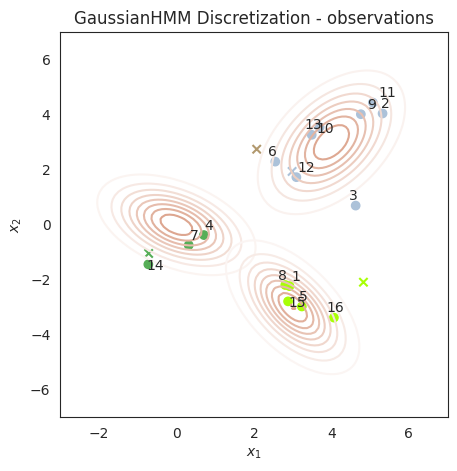

In [16]:
sns.set_style("white")

plt.figure(figsize=(5, 5))

x1, y1 = -3,  -7
x2, y2 = 7, 7

XX, YY = np.meshgrid(np.linspace(x1, x2, 100), np.linspace(y1, y2, 100))
data = np.column_stack((XX.ravel(), YY.ravel()))
lls = np.concatenate([scipy.stats.multivariate_normal(mu[i], Sigma[i]).pdf(data).reshape(-1, 1) for i in range(3)], axis=1)

for k in range(3):
    plt.contour(XX, YY, np.exp(lls[:, k]).reshape(XX.shape), levels=8, cmap=white_to_color_cmap(colors[16]))
    
plt.scatter(nodes[0], nodes[1], color=colors[:no_nodes], marker='x')
plt.scatter(X[:, 0], X[:, 1], color=[colors[np.square(X[i, :][:, np.newaxis] - nodes).sum(axis=0).argmin()] for i in range(X.shape[0])])

for i in range(16):
    x = np.random.uniform(-.2, .2) if i not in [7] else -.2
    y = .2 if i not in [14,  9, 13] else -.2
    plt.text(res3[i][0] + x, res3[i][1] + y, str(i+1), in_layout=True)
    
    
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("GaussianHMM Discretization - observations")
plt.savefig('cont_cooc_example.eps', format='eps')
plt.show()
plt.close()

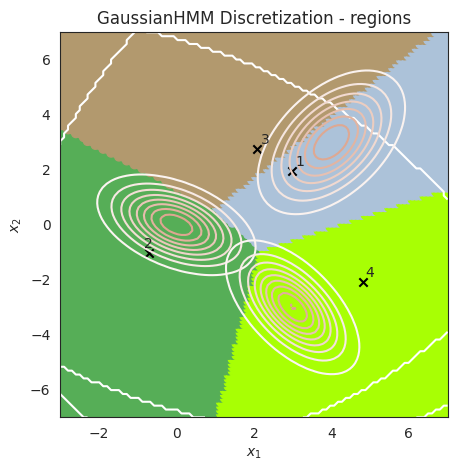

In [17]:
plt.figure(figsize=(5, 5))



plt.scatter(data[:, 0], data[:, 1], color=[colors[np.square(data[i, :][:, np.newaxis] - nodes).sum(axis=0).argmin()] for i in range(data.shape[0])])
for k in range(3):
    plt.contour(XX, YY, np.exp(lls[:, k]).reshape(XX.shape), levels=8, cmap=white_to_color_cmap(colors[16]))
plt.scatter(nodes[0], nodes[1], color='black', marker='x')

for i in range(no_nodes):
    x = np.random.uniform(-.2, .2) if i not in [7] else -.2
    y = .2 if i not in [14,  9, 13] else -.2
    plt.text(nodes[0, i] + x, nodes[1, i] + y, str(i+1), in_layout=True)

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("GaussianHMM Discretization - regions")
plt.savefig('cont_cooc_example_regions.eps', format='eps')
plt.show()
plt.close()

In [18]:
for n in nodes.T:
    print(
        "\left( \\begin{array}{c}\n" +
        str(round(n[0], 2)) + "\\\\" + str(round(n[1], 2)) + "\n" + 
        "\\end{array} \\right)"
    )

\left( \begin{array}{c}
2.99\\1.94
\end{array} \right)
\left( \begin{array}{c}
-0.72\\-1.04
\end{array} \right)
\left( \begin{array}{c}
2.07\\2.75
\end{array} \right)
\left( \begin{array}{c}
4.83\\-2.09
\end{array} \right)


In [19]:
print(", ".join(["\\textcolor{" + colors_[c - 1] + "}{" + "\left( \\begin{array}{c}" +
        str(round(v[0], 2)) + "\\\\" + str(round(v[1], 2)) + 
        "\\end{array} \\right)" + "}\n" for c, v in zip(res, [nodes[:, np.square(X[i, :][:, np.newaxis] - nodes).sum(axis=0).argmin()] for i in range(X.shape[0])])]))

\textcolor{teal}{\left( \begin{array}{c}4.83\\-2.09\end{array} \right)}
, \textcolor{purple}{\left( \begin{array}{c}2.99\\1.94\end{array} \right)}
, \textcolor{purple}{\left( \begin{array}{c}2.99\\1.94\end{array} \right)}
, \textcolor{blue}{\left( \begin{array}{c}-0.72\\-1.04\end{array} \right)}
, \textcolor{teal}{\left( \begin{array}{c}4.83\\-2.09\end{array} \right)}
, \textcolor{purple}{\left( \begin{array}{c}2.99\\1.94\end{array} \right)}
, \textcolor{blue}{\left( \begin{array}{c}-0.72\\-1.04\end{array} \right)}
, \textcolor{teal}{\left( \begin{array}{c}4.83\\-2.09\end{array} \right)}
, \textcolor{purple}{\left( \begin{array}{c}2.99\\1.94\end{array} \right)}
, \textcolor{purple}{\left( \begin{array}{c}2.99\\1.94\end{array} \right)}
, \textcolor{purple}{\left( \begin{array}{c}2.99\\1.94\end{array} \right)}
, \textcolor{purple}{\left( \begin{array}{c}2.99\\1.94\end{array} \right)}
, \textcolor{purple}{\left( \begin{array}{c}2.99\\1.94\end{array} \right)}
, \textcolor{blue}{\left( \beg

In [41]:
print(", ".join(["\\textcolor{" + colors_[c - 1] + "}{\\mathcal Y^{\\mathcal D}[" + str(v+1) + "]}\n" for c, v in zip(res, [np.square(X[i, :][:, np.newaxis] - nodes).sum(axis=0).argmin() for i in range(X.shape[0])])]))

\textcolor{teal}{\mathcal Y^{\mathcal D}[4]}
, \textcolor{purple}{\mathcal Y^{\mathcal D}[1]}
, \textcolor{purple}{\mathcal Y^{\mathcal D}[1]}
, \textcolor{blue}{\mathcal Y^{\mathcal D}[2]}
, \textcolor{teal}{\mathcal Y^{\mathcal D}[4]}
, \textcolor{purple}{\mathcal Y^{\mathcal D}[1]}
, \textcolor{blue}{\mathcal Y^{\mathcal D}[2]}
, \textcolor{teal}{\mathcal Y^{\mathcal D}[4]}
, \textcolor{purple}{\mathcal Y^{\mathcal D}[1]}
, \textcolor{purple}{\mathcal Y^{\mathcal D}[1]}
, \textcolor{purple}{\mathcal Y^{\mathcal D}[1]}
, \textcolor{purple}{\mathcal Y^{\mathcal D}[1]}
, \textcolor{purple}{\mathcal Y^{\mathcal D}[1]}
, \textcolor{blue}{\mathcal Y^{\mathcal D}[2]}
, \textcolor{teal}{\mathcal Y^{\mathcal D}[4]}
, \textcolor{teal}{\mathcal Y^{\mathcal D}[4]}


In [21]:
Xd = np.array([np.square(X[i, :][:, np.newaxis] - nodes).sum(axis=0).argmin() for i in range(X.shape[0])])

In [22]:
Xd

array([3, 0, 0, 1, 3, 0, 1, 3, 0, 0, 0, 0, 0, 1, 3, 3])

In [26]:
Q_gt = np.zeros((no_nodes, no_nodes))
for i in range(Xd.shape[0] - 1):
    Q_gt[Xd[i], Xd[i+1]] += 1
print(Q_gt)

# Q_gt /= Q_gt.sum()
# 
# Q_gt

[[5. 3. 0. 0.]
 [0. 0. 0. 3.]
 [0. 0. 0. 0.]
 [3. 0. 0. 1.]]


In [27]:
import pandas as pd
print(pd.DataFrame(Q_gt).to_latex(index=False, float_format='%d'))

\begin{tabular}{rrrr}
\toprule
 0 &  1 &  2 &  3 \\
\midrule
 5 &  3 &  0 &  0 \\
 0 &  0 &  0 &  3 \\
 0 &  0 &  0 &  0 \\
 3 &  0 &  0 &  1 \\
\bottomrule
\end{tabular}


/tmp/ipykernel_41048/4279029662.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame(Q_gt).to_latex(index=False, float_format='%d'))


In [38]:
print(pd.DataFrame(Q_gt / Q_gt.sum()).to_latex(index=False, float_format='%.3f'))

\begin{tabular}{rrrr}
\toprule
    0 &     1 &     2 &     3 \\
\midrule
0.333 & 0.200 & 0.000 & 0.000 \\
0.000 & 0.000 & 0.000 & 0.200 \\
0.000 & 0.000 & 0.000 & 0.000 \\
0.200 & 0.000 & 0.000 & 0.067 \\
\bottomrule
\end{tabular}


/tmp/ipykernel_41048/4099768296.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame(Q_gt / Q_gt.sum()).to_latex(index=False, float_format='%.3f'))


In [40]:
Q_gt / Q_gt.sum()

array([[0.33333333, 0.2       , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.2       ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.2       , 0.        , 0.        , 0.06666667]])

In [45]:
import scipy
B = np.zeros((3, no_nodes))
for i in range(3):
    for j in range(no_nodes):
        B[i, j] = scipy.stats.multivariate_normal.pdf(nodes[:, j], mu[i], Sigma[i])

In [50]:
print(pd.DataFrame(B).to_latex(index=False, float_format='%.6f'))

\begin{tabular}{rrrr}
\toprule
       0 &        1 &        2 &        3 \\
\midrule
0.000001 & 0.038769 & 0.000001 & 0.000002 \\
0.000000 & 0.000001 & 0.000000 & 0.000327 \\
0.078506 & 0.000000 & 0.012336 & 0.000000 \\
\bottomrule
\end{tabular}


/tmp/ipykernel_41048/812857974.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame(B).to_latex(index=False, float_format='%.6f'))


In [54]:
B.sum(axis=1)

array([0.03877273, 0.00032833, 0.09084382])

In [56]:
print(pd.DataFrame(B / B.sum(axis=1)[:, np.newaxis]).to_latex(index=False, float_format='%.6f'))

\begin{tabular}{rrrr}
\toprule
       0 &        1 &        2 &        3 \\
\midrule
0.000028 & 0.999901 & 0.000027 & 0.000044 \\
0.000130 & 0.003088 & 0.000047 & 0.996735 \\
0.864191 & 0.000005 & 0.135798 & 0.000005 \\
\bottomrule
\end{tabular}


/tmp/ipykernel_41048/1569945339.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame(B / B.sum(axis=1)[:, np.newaxis]).to_latex(index=False, float_format='%.6f'))


In [57]:
Bd = B / B.sum(axis=1)[:, np.newaxis]

In [58]:
Bd @ S @ Bd

NameError: name 'S' is not defined

In [60]:
print(pd.DataFrame(Bd.T @ ((np.array([2,  3, 9]).reshape(-1,  1) * A / 140)@Bd) ).to_latex(index=False, float_format='%.6f'))

\begin{tabular}{rrrr}
\toprule
       0 &        1 &        2 &        3 \\
\midrule
0.038410 & 0.011110 & 0.006036 & 0.000002 \\
0.000036 & 0.001468 & 0.000006 & 0.012840 \\
0.006036 & 0.001746 & 0.000949 & 0.000001 \\
0.011076 & 0.000027 & 0.001741 & 0.008516 \\
\bottomrule
\end{tabular}


/tmp/ipykernel_41048/3431652757.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame(Bd.T @ ((np.array([2,  3, 9]).reshape(-1,  1) * A / 140)@Bd) ).to_latex(index=False, float_format='%.6f'))
